In [1]:
#pip install datasets 
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df["job_title_short"]=="Data Analyst"].copy()

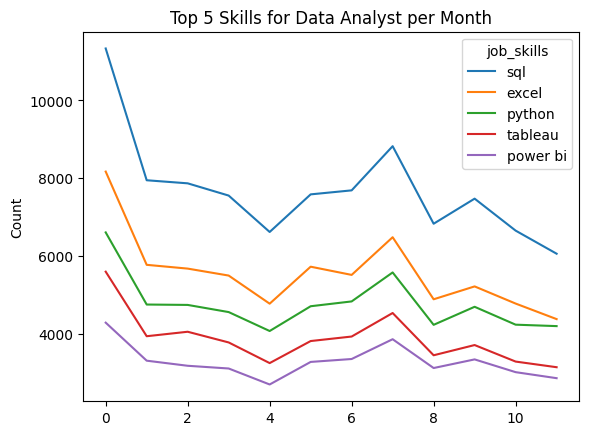

In [6]:
df_DA = df[df["job_title_short"]=="Data Analyst"].copy()
#create a new column for month number
df_DA["job_posted_month_no"] = df_DA["job_posted_date"].dt.month

#explode the job_skills column an pivot 
df_DA_explode = df_DA.explode("job_skills")
df_DA_pivot = df_DA_explode.pivot_table(index="job_posted_month_no", columns= "job_skills", aggfunc="size" ,fill_value=0)

#sort the skills by count 
df_DA_pivot.loc["Total"]= df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop(index="Total")

#Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_pivot=df_DA_pivot.drop(columns=["job_posted_month_no"])

#get the top 5 skills
df_DA_pivot.iloc[:,:5].plot(kind="line")
plt.title("Top 5 Skills for Data Analyst per Month")
plt.ylabel("Count")
plt.show()

In [7]:
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse,job_posted_month
0,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,1,1,0,0,0,Jan
1,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,Feb
2,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,0,0,0,0,0,0,0,1,Mar
3,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,1,0,Apr
4,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,1,0,0,May
5,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,Jun
6,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,1,0,0,0,0,0,0,0,Jul
7,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,Aug
8,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,1,0,0,0,0,0,0,0,0,Sep
9,7474,5217,4693,3709,3340,2380,2114,955,990,872,...,0,0,0,0,0,0,0,0,0,Oct


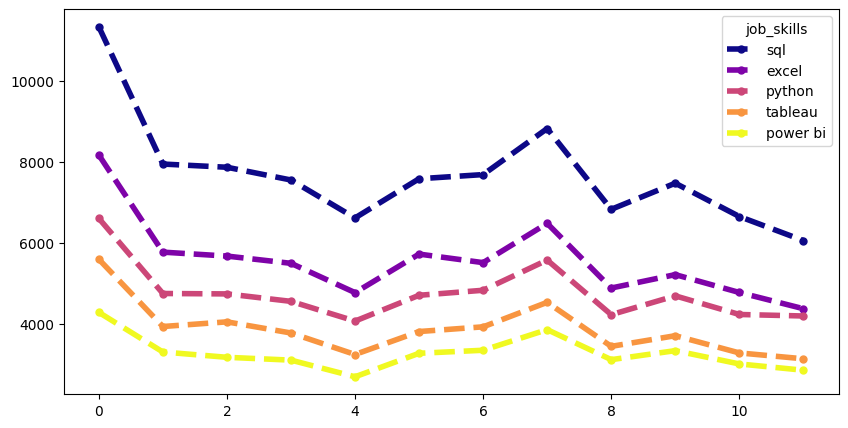

In [23]:
df_DA_pivot.iloc[:,:5].plot(
    kind="line",
    linewidth=4,
    linestyle="--", #options include '-', '--', '-.', ':'
    colormap="plasma", #options include 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    marker="o", #options include 'o', 's', '^', 'D',
    markersize=5, #size of the markers
    figsize=(10,5) #size of the figure
    )
plt.show()

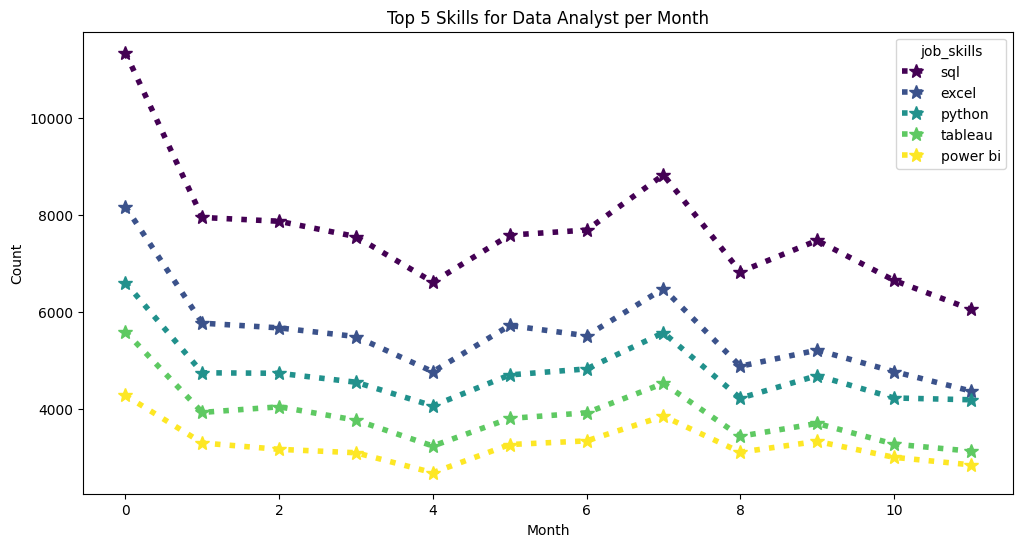

In [45]:
df_DA_pivot.iloc[:,:5].plot(
    kind="line",
    linewidth=4,
    linestyle=":",
    colormap="viridis" ,#options include '-', '--', '-.', ':')
    marker="*",#options include 'o', 's', '^', 'D','x', 'v', '<', '>', 'p', '*', 'h', 'H', '+', 'x', '|', '_'
    markersize=10, #size of the markers
    figsize=(12,6) #size of the figure
 )

plt.title("Top 5 Skills for Data Analyst per Month")
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()